In [8]:
import pandas as pd
import numpy as np
import os

In [9]:
#导入数据
loanfile = os.listdir()
createVar = locals()
for i in loanfile:
    if i.endswith('csv'):
        createVar[i.split('.')[0]] = pd.read_csv(i, encoding = 'gbk')
        print(i.split('.')[0])

district
clients
accounts
loans


/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


trans
card
order
disp


In [10]:
#创建被解释变量
bad_good = {'B':1,'D':1,'A':0,'C':2}
loans['bad_good'] = loans.status.map(bad_good)
loans.head()

,loan_id,account_id,date,amount,duration,payments,status,bad_good
0,5314,1787,1993-07-05,96396,12,8033,B,1
1,5316,1801,1993-07-11,165960,36,4610,A,0
2,6863,9188,1993-07-28,127080,60,2118,A,0
3,5325,1843,1993-08-03,105804,36,2939,A,0
4,7240,11013,1993-09-06,274740,60,4579,A,0


In [11]:
#表征信息
data2 = pd.merge(loans,disp,on = 'account_id',how = 'left')
data2 = pd.merge(data2,clients,on='client_id',how = 'left')
data2 = data2[data2.type == '所有者']
data2.head()

,loan_id,account_id,date,amount,duration,payments,status,bad_good,disp_id,client_id,type,sex,birth_date,district_id
0,5314,1787,1993-07-05,96396,12,8033,B,1,2166,2166,所有者,女,1947-07-22,30
1,5316,1801,1993-07-11,165960,36,4610,A,0,2181,2181,所有者,男,1968-07-22,46
2,6863,9188,1993-07-28,127080,60,2118,A,0,11006,11314,所有者,男,1936-06-02,45
3,5325,1843,1993-08-03,105804,36,2939,A,0,2235,2235,所有者,女,1940-04-20,14
4,7240,11013,1993-09-06,274740,60,4579,A,0,13231,13539,所有者,男,1978-09-07,63


In [12]:
#状态信息
data3 = pd.merge(data2,district,left_on = 'district_id',right_on = 'A1',how = 'left')
data3.head()

,loan_id,account_id,date,amount,duration,payments,status,bad_good,disp_id,client_id,...,A1,GDP,A4,A10,A11,A12,A13,A14,A15,a16
0,5314,1787,1993-07-05,96396,12,8033,B,1,2166,2166,...,30,16979,94812,81.8,9650,3.38,3.67,100,15.7,14.8
1,5316,1801,1993-07-11,165960,36,4610,A,0,2181,2181,...,46,14111,112709,73.5,8369,1.79,2.31,117,12.7,11.6
2,6863,9188,1993-07-28,127080,60,2118,A,0,11006,11314,...,45,12888,77917,53.5,8390,2.28,2.89,132,13.3,13.6
3,5325,1843,1993-08-03,105804,36,2939,A,0,2235,2235,...,14,31891,177686,74.8,10045,1.42,1.71,135,18.6,17.7
4,7240,11013,1993-09-06,274740,60,4579,A,0,13231,13539,...,63,11322,86513,50.5,8288,3.79,4.52,110,9.0,8.4


In [14]:
#行为信息
data_4temp1 = pd.merge(loans[['account_id','date']],trans[['account_id','type','amount','balance','date']],on='account_id')
data_4temp1.columns = ['account_id','date','type','amount','balance','t_date']
data_4temp1 = data_4temp1.sort_values(by = ['account_id','t_date'])
data_4temp1['date'] = pd.to_datetime(data_4temp1['date'])
data_4temp1['t_date'] = pd.to_datetime(data_4temp1['t_date'])
data_4temp1['balance2'] = data_4temp1['balance'].map(lambda x:int(''.join(x[1:].split(','))))
data_4temp1['amount2'] = data_4temp1['amount'].map(lambda x:int(''.join(x[1:].split(','))))

In [15]:
import datetime
data_4temp2=data_4temp1[data_4temp1.date>data_4temp1.t_date][data_4temp1.date<data_4temp1.t_date+datetime.timedelta(days=365)]
data_4temp2.head()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,account_id,date,type,amount,balance,t_date,balance2,amount2
10020,2,1994-01-05,贷,"$1,100","$1,100",1993-02-26,1100,1100
10021,2,1994-01-05,贷,$20236,$21336,1993-03-12,21336,20236
10022,2,1994-01-05,贷,"$3,700",$25036,1993-03-28,25036,3700
10023,2,1994-01-05,贷,$14,$25050,1993-03-31,25050,14
10024,2,1994-01-05,贷,$20236,$45286,1993-04-12,45286,20236


In [20]:
data_4temp3=data_4temp2.groupby('account_id')['balance2'].agg([('avg_balance','mean'),('stdev_balance','std')])
data_4temp3['cv_balance']=data_4temp3[['avg_balance','stdev_balance']].apply(lambda x:x[1]/x[0],axis=1)
type_dict={'借':'out','贷':'income'}
data_4temp2['type1']=data_4temp2.type.map(type_dict)
data_4temp4=data_4temp2.groupby(['account_id','type1'])[['amount2']].sum()
data_4temp4.head()

amount2
account_id type1          
2          income   276514
           out      153020
19         income   254255
           out      198020
25         income   726479

In [29]:
data_4temp5 = pd.pivot_table(data_4temp4,values = 'amount2',index = 'account_id',columns = 'type1')
data_4temp5['r_out_in'] = data_4temp5[['out','income']].apply(lambda x:x[1]/x[0],axis = 1)
data_4temp5.head()

type1,income,out,r_out_in
account_id,,,
2,276514.0,153020.0,1.807045
19,254255.0,198020.0,1.283986
25,726479.0,629108.0,1.154776
37,386357.0,328541.0,1.175978
38,154300.0,105091.0,1.468251


In [30]:
data4=pd.merge(data3,data_4temp3,left_on='account_id',right_index=True,how='left')
data4=pd.merge(data4,data_4temp5,left_on='account_id',right_index=True,how='left')
data4['r_lb']=data4[['amount','avg_balance']].apply(lambda x:x[0]/x[1],axis=1)
data4['r_lincome']=data4[['amount','income']].apply(lambda x:x[0]/x[1],axis=1)

In [31]:
#建立分析模型
#样本随机抽样，建立训练集和测试集
#提取状态为C的样本用于预测

data_model=data4[data4.status!='C']
for_predict=data4[data4.status=='C']
train=data_model.sample(frac=0.7,random_state=1235).copy()
test=data_model[~data_model.index.isin(train.index)].copy()
print('训练集样本量：%i\n测试集样本量：%i'%(len(train),len(test)))

训练集样本量：195
测试集样本量：84


In [32]:
#向前逐步法
import statsmodels.formula.api as smf
import statsmodels.api as sm
def forward_select(data, response):
    import statsmodels.api as sm
    import statsmodels.formula.api as smf
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')
    while remaining:
        aic_with_candidates=[]
        for candidate in remaining:
            formula = "{} ~ {}".format(
                response,' + '.join(selected + [candidate]))
            aic = smf.glm(
                formula=formula, data=data, 
                family=sm.families.Binomial(sm.families.links.logit)
            ).fit().aic
            aic_with_candidates.append((aic, candidate))
        aic_with_candidates.sort(reverse=True)
        best_new_score, best_candidate=aic_with_candidates.pop()
        if current_score > best_new_score: 
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            print ('aic is {},continuing!'.format(current_score))
        else:        
            print ('forward selection over!')
            break
            
    formula = "{} ~ {} ".format(response,' + '.join(selected))
    print('final formula is {}'.format(formula))
    model = smf.glm(
        formula=formula, data=data, 
        family=sm.families.Binomial(sm.families.links.logit)
    ).fit()
    return(model)

In [33]:
#采用向前逐步法进行逻辑回归建模：
candidates=['bad_good','A1','GDP','A4','A10','A11','A12','amount','duration','A13','A14','A15','a16','avg_balance','stdev_balance','cv_balance','income','out','r_out_in','r_lb','r_lincome']
data_for_select=train[candidates]
lg_m1=forward_select(data=data_for_select,response='bad_good')
lg_m1.summary().tables[1]

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.


aic is 167.43311432504638,continuing!
aic is 135.8243585604184,continuing!
forward selection over!
final formula is bad_good ~ r_lb + cv_balance 


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-7.4260,1.125,-6.599,0.000,-9.632,-5.220
r_lb,0.4391,0.094,4.651,0.000,0.254,0.624
cv_balance,10.1355,2.094,4.841,0.000,6.032,14.239


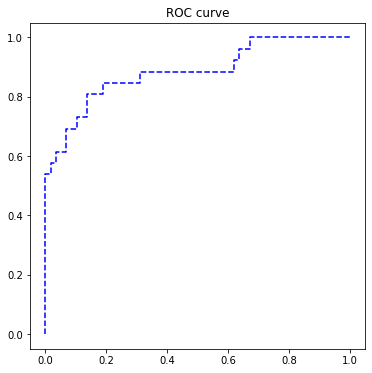

In [35]:
#模型效果评估
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
fpr, tpr, th = metrics.roc_curve(test.bad_good, lg_m1.predict(test))
plt.figure(figsize=[6, 6])
plt.plot(fpr, tpr, 'b--')
plt.title('ROC curve')
plt.show()